In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [1]:
import tensorflow as tf

In [3]:
print(tf.__version__)

1.7.0


In [2]:
train= pd.read_csv('housetrain.csv')

In [3]:
test= pd.read_csv('housetest.csv')

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


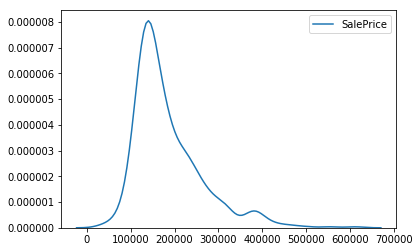

In [18]:
#sns.kdeplot(train['MSSubClass'])
#sns.countplot(x="MSSubClass", data=train)
sum(train['MSSubClass'].isnull())
a=train.groupby(['MSSubClass'], as_index=False).mean()
a[['MSSubClass','SalePrice']]
b=train[train['MSSubClass']==20]
sns.kdeplot(b['SalePrice'])

NameError: name 'boxplot' is not defined

In [14]:
train['MSSubClass'].describe()

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

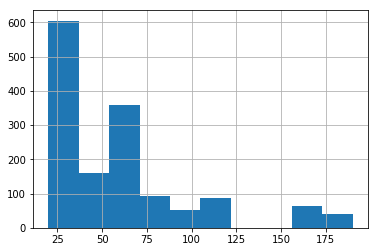

In [16]:
train['MSSubClass'].hist(bins=10)
plt.pyplot.show()

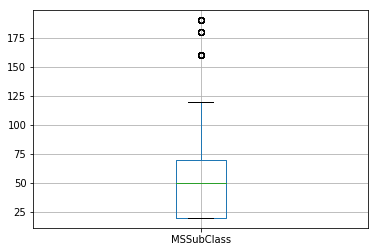

In [18]:
train.boxplot(column='MSSubClass',return_type='dict')
plt.pyplot.show()

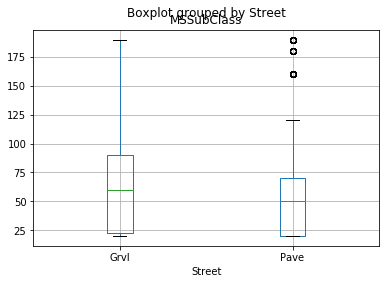

In [19]:
train.boxplot(column='MSSubClass',by='Street')

In [21]:
train['MSSubClass'].isnull().sum()
train['MSSubClass'].dropna()


0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
       ... 
1430     60
1431    120
1432     30
1433     60
1434     20
1435     20
1436     20
1437     20
1438     20
1439     60
1440     70
1441    120
1442     60
1443     30
1444     20
1445     85
1446     20
1447     60
1448     50
1449    180
1450     90
1451     20
1452    180
1453     20
1454     20
1455     60
1456     20
1457     70
1458     20
1459     20
Name: MSSubClass, Length: 1460, dtype: int64

In [29]:
train[catecory_var].head

<bound method NDFrame.head of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60          NaN    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      

In [22]:
from sklearn.preprocessing import Imputer

In [ ]:
imp_mean = Imputer(missing_values='NaN', strategy ='mean', axis=1)
imp_mean = imp_mean.fit(train)
imp_mean_dat = imp_mean.transform(train.values)

In [25]:
train['MSZoning'].describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

In [26]:
from sklearn.preprocessing import OneHotEncoder

In [30]:
"""ht_ohe = OneHotEncoder(categorical_features=[0])
ht_ohe.fit_transform(train['MSZoning']).toarray()"""
pd.get_dummies(train[['MSZoning']])

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,0,1
9,0,0,0,1,0


In [32]:
"""from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
x_dat_scaling = mmscaler.fit_transform(train['LotFrontage'])"""
# 정규 표준화 척도조정
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
x_dat_std = stdscaler.fit_transform(train['LotFrontage'])

ValueError: Expected 2D array, got 1D array instead:
array=[65. 80. 68. ... 66. 68. 75.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
train.rank()
train.sort_index()
train.sort_values(by='MSZoning')
train.index

RangeIndex(start=0, stop=1460, step=1)

In [61]:
from pandas import Series, DataFrame
train['LotShape'].index

RangeIndex(start=0, stop=1460, step=1)

AttributeError: module 'matplotlib' has no attribute 'show'

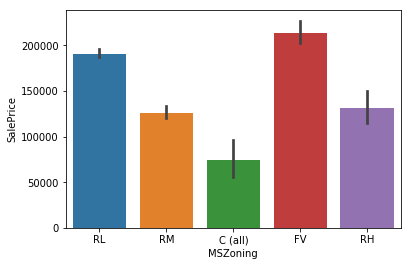

In [20]:
sns.barplot(x="MSZoning", y="SalePrice", data=train)
plt.show()

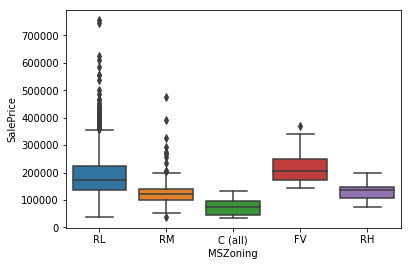

In [22]:
sns.boxplot(x="MSZoning", y="SalePrice", data=train)

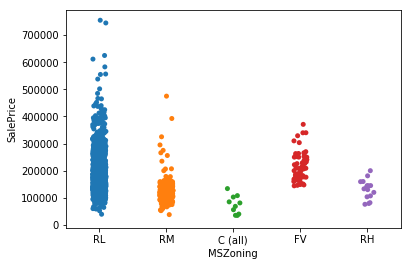

In [24]:
sns.stripplot(x="MSZoning", y="SalePrice", data=train, jitter=True)

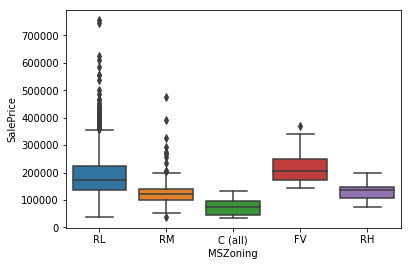

In [25]:
r = sns.boxplot(x="MSZoning", y="SalePrice", data=train)

In [26]:
top_points = r["fliers"][0].get_data()[1]

TypeError: 'AxesSubplot' object is not subscriptable

In [28]:
r.

AttributeError: 'AxesSubplot' object has no attribute 'columns'